<center><h3>Lab 2: Regression Analysis</h3></center>
<p style='text-align:center'>R Abhijit Srivathsan<br>
2448044</p>

<center><i><h2>Simple Linear Regression</h2></i></center>

### Importing Libraries

In [22]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error,mean_absolute_percentage_error,r2_score # type: ignore

### Importing Data

In [23]:
df = pd.read_csv(r"Salary_Data.csv")

### Exploratory Data Analysis

In [24]:
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [25]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [26]:
df.isnull().sum()

Years of Experience    3
Salary                 5
dtype: int64

### Dropping `Na` Values

In [27]:
df = df.dropna()

### Double Checking `Na` values

In [28]:
df.isnull().sum()

Years of Experience    0
Salary                 0
dtype: int64

### Scatter Plot

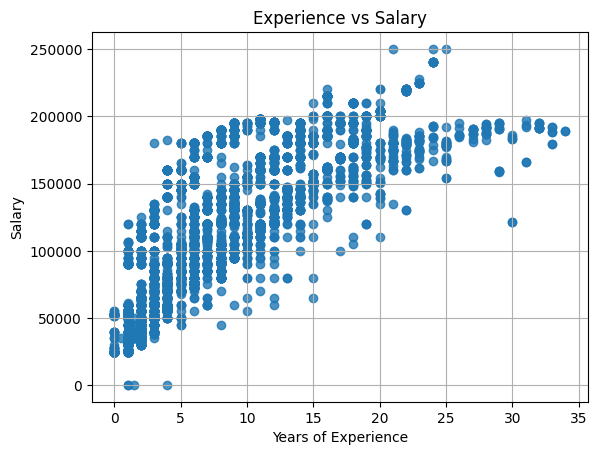

In [29]:
import matplotlib.pyplot as plt #type: ignore
# Scatter plot
plt.scatter(df['Years of Experience'], df['Salary'], alpha=0.8)

# Adding labels and title
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)

# Display the plot
plt.show()

### Boxplot

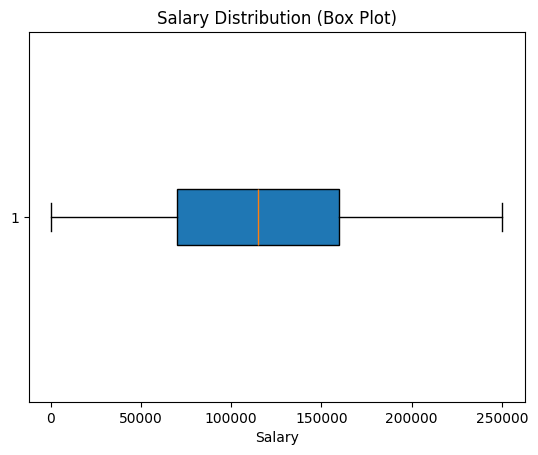

In [30]:
plt.boxplot(df['Salary'], vert=False, patch_artist=True)
plt.title('Salary Distribution (Box Plot)')
plt.xlabel('Salary')
plt.show()

### Removing Outliers

In [31]:
from scipy.stats import zscore #type: ignore

# Compute Z-scores for each column
z_scores = df.apply(zscore)

# Remove rows where Z-scores are above the threshold
threshold = 3
filtered_df = df[(z_scores['Years of Experience'].abs() < threshold) & 
                 (z_scores['Salary'].abs() < threshold)]

print("Filtered DataFrame using Z-score:")
filtered_df.head()
df = filtered_df
df.head()

Filtered DataFrame using Z-score:


,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


### Defining $Feature$ & $Target$ Variable

In [32]:
X = df[['Years of Experience']]  # Features (independent variable)
y = df['Salary']        # Target (dependent variable)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.head()

,Years of Experience
5236,1.0
3810,6.0
5788,11.0
2444,20.0
2822,4.0


### Model Creation & Fitting

In [34]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [7628.64855815]
Model Intercept: 54782.12093941802


### Making Predictions

In [35]:
y_pred = model.predict(X_test)
y_pred

array([100554.01228834, 100554.01228834,  62410.76949757, ...,
        70039.41805572, 176840.49786987, 115811.30940465])

### Model Evaluation

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Absolute Error = ', mae)
print('Mean Absolute Percentage Error = ', mape)
print('Mean Squared Error = ', mse)
print('R2 Square = ', r_squared)

Mean Absolute Error =  23915.596408834117
Mean Absolute Percentage Error =  0.36376219576985663
Mean Squared Error =  887272056.0967814
R2 Square =  0.6824007270036381


### Plotting the Model

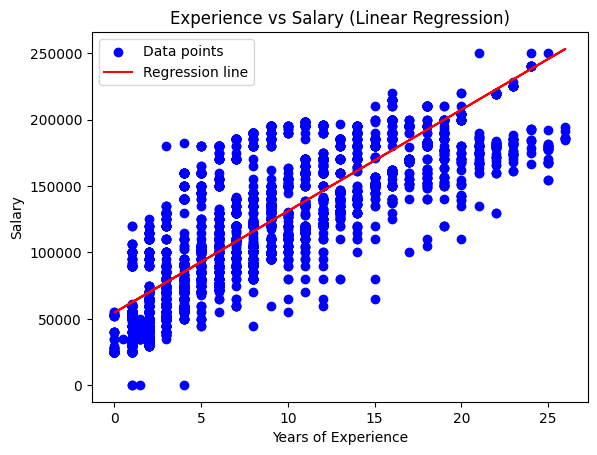

In [37]:
# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression line')

plt.title('Experience vs Salary (Linear Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

### Actual vs Predicted graph

Text(0, 0.5, 'Predicted')

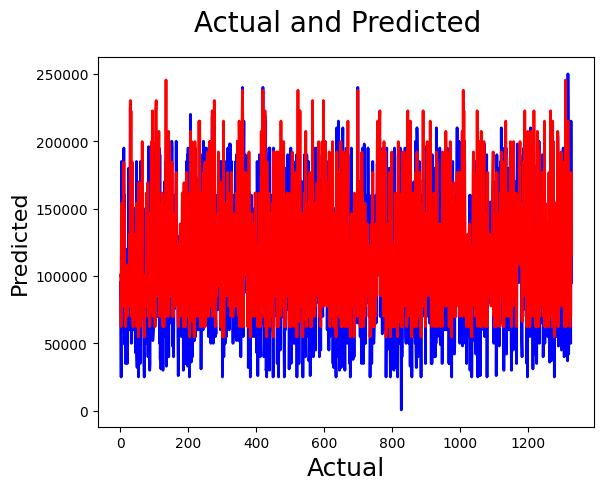

In [38]:
c = [i for i in range(1,len(y_test)+1,1)]         
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                              
plt.ylabel('Predicted', fontsize=16)    

### Predicting our Data

In [39]:
model.predict([[10.0]])

c:\Users\abhij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([131068.60652095])

<center><i><h2>Multiple Linear Regression</h2></i></center>

### Importing Libraries

In [40]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns# type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_absolute_error # type: ignore
from sklearn.metrics import mean_absolute_percentage_error # type: ignore  
from sklearn.metrics import mean_squared_error # type: ignore
from sklearn.metrics import r2_score # type: ignore

### Reading data

In [41]:
df = pd.read_csv(r"auto-mpg.csv")

### Exploratory Data Analysis

In [42]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [43]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Checking for `Na` values

In [44]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Histogram

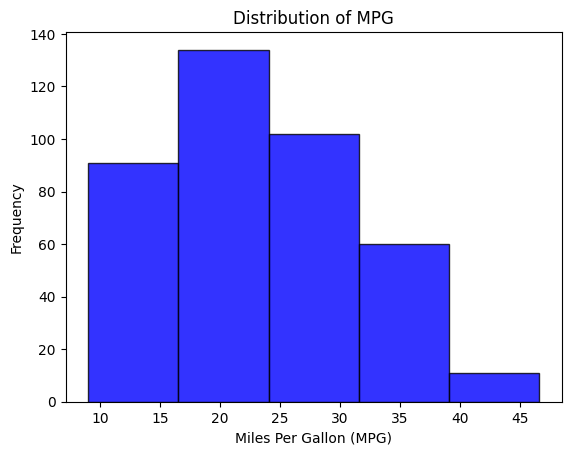

In [45]:
# Histogram
plt.hist(df['mpg'], bins=5, alpha=0.8, color='blue', edgecolor='black')
plt.title('Distribution of MPG')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Frequency')
plt.show()

### Scatter Plot

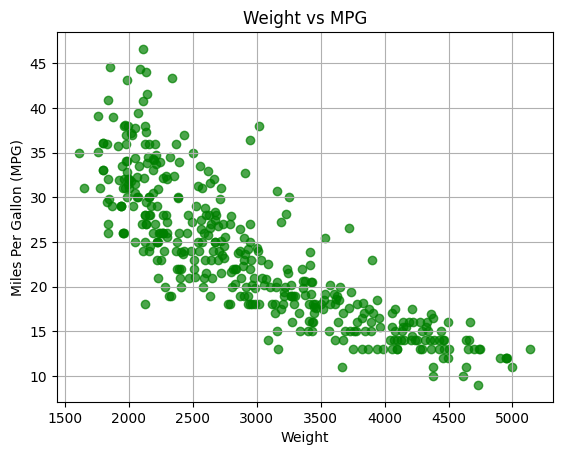

In [46]:
plt.scatter(df['weight'], df['mpg'], color='green', alpha=0.7)
plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True)
plt.show()

### Boxplot

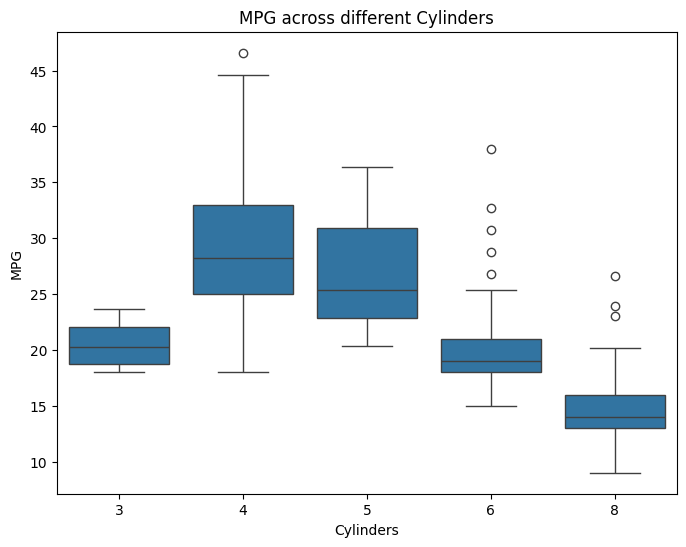

In [47]:
# Boxplot for 'mpg' across different 'cylinders'
plt.figure(figsize=(8, 6))
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.title('MPG across different Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()

### Checking unique values

In [48]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

### Handling the <code>?</code>

In [49]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())  # Filling with mean
df['horsepower'] = df['horsepower'].astype(int)

### Defining *Features* & *Targets*

In [50]:
X = df[['horsepower', 'weight', 'cylinders']]  # Independent variables
y = df['mpg']  # Dependent variable

### Train-Test split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize and fit the model

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-0.04200823 -0.0055421  -0.38424958]
Model Intercept: 46.4888075862964


### Making predictions on the test set

In [58]:
y_pred = model.predict(X_test)
y_pred[:5]

array([32.77730668, 27.08515113, 25.3846003 , 15.27770931, 13.63170611])

### Evaluating the model

In [59]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Absolute Error = ', mae)
print('Mean Absolute Percentage Error = ', mape)
print('Mean Squared Error = ', mse)
print('R2 Square = ', r_squared)

Mean Absolute Error =  3.104054179560218
Mean Absolute Percentage Error =  0.14277970747073176
Mean Squared Error =  14.498733635097096
R2 Square =  0.7303386159867213


### Checking Regression Line

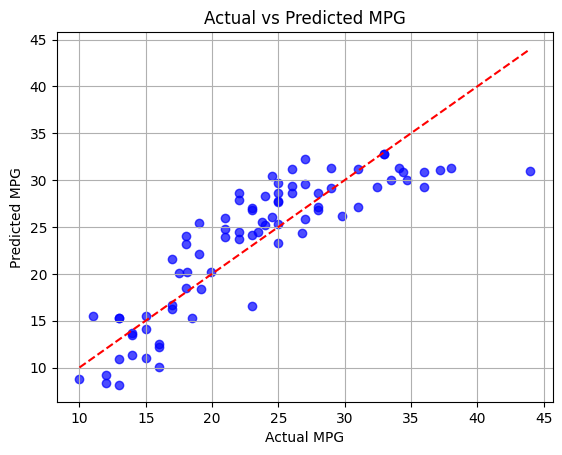

In [60]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line
plt.title('Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.grid(True)
plt.show()

### Plotting Actual vs Predicted

Text(0, 0.5, 'Predicted')

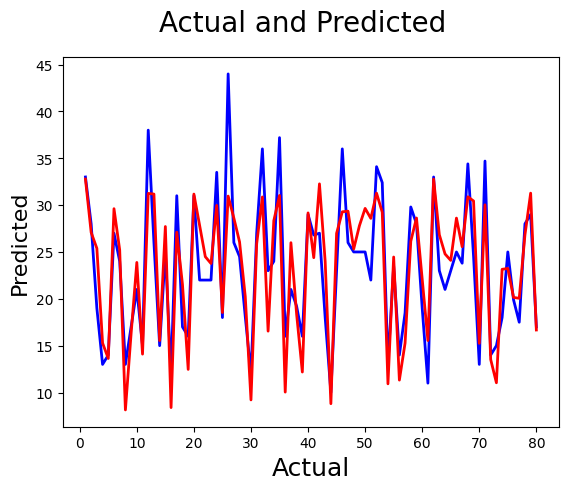

In [61]:
c = [i for i in range(1,len(y_test)+1,1)]         
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                              
plt.ylabel('Predicted', fontsize=16)

### Model Prediction

In [62]:
model.predict([[110,2720,3]])

c:\Users\abhij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.64064629])